In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [7]:
# Define the paths to your training and testing datasets
train_data_dir = 'C:/Users/User/Downloads/terrain classification/dataset-1/train'
test_data_dir = 'C:/Users/User/Downloads/terrain classification/dataset-1/test'

In [8]:
# Set hyperparameters
batch_size = 32
epochs = 10
input_shape = (224, 224, 3)  # Adjust dimensions as per your dataset

In [9]:
# Data augmentation for the training dataset (optional but recommended)
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [10]:
# Load and preprocess the training dataset
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'  # Change to 'binary' if it's binary classification
)


Found 1813 images belonging to 4 classes.


In [11]:
# Load and preprocess the testing dataset
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

Found 778 images belonging to 4 classes.


In [12]:
# Define your CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Adjust num_classes

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/30
30/57 [==============>...............] - ETA: 1:10 - loss: 1.4589 - accuracy: 0.5375

In [ ]:
# Evaluate the model
accuracy = model.evaluate(test_generator, steps=len(test_generator))
print("Test accuracy:", accuracy[1])

In [4]:
from tensorflow.keras.models import save_model

# Save your trained model to a file
model.save('my_model.h5')  # Replace 'my_model.h5' with your desired file name

C:\Users\User\anaconda3\New folder\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
from tensorflow.keras.models import load_model

model = load_model('my_model.h5')  # Replace with the path to your saved model file

In [1]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the new image you want to classify
new_image_path = 'C:/Users/User/Desktop/preview16.jpg'  # Replace with the path to your image
new_image = image.load_img(new_image_path, target_size=(224, 224))  # Adjust target_size as needed
new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis=0)
new_image = new_image / 255.0  # Normalize the image data

In [2]:
# Use the loaded model to predict the class of the new image
predictions = model.predict(new_image)

# Get the predicted class label (assuming one-hot encoding is used)
predicted_class_index = np.argmax(predictions)

# You may have a mapping of class indices to class names
class_names = {0: 'grassy', 1: 'marshy', 2: 'rocky', 3: 'sandy'}  # Update with your class names

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index]

print("Predicted class:", predicted_class_name)

NameError: name 'model' is not defined

In [46]:
class_indices = np.argmax(predictions, axis=1)
print (class_indices)

[1]


In [47]:
print (predictions)

[[5.9870713e-11 1.0000000e+00 5.6010228e-09 3.1583505e-10]]


In [48]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Load your test dataset
test_data_dir = 'C:/Users/User/Downloads/terrain classification/dataset-1/test'  # Replace with the path to your test dataset
batch_size = 32  # Adjust batch size as needed

test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Make sure to use the same preprocessing as during training

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_shape[:2],  # Use the same target size as during training
    batch_size=batch_size,
    class_mode='categorical'  # Change to 'binary' if it's binary classification
)

# Predict the classes for the test dataset
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes from the test dataset
true_classes = test_generator.classes

# Calculate confusion matrix and other metrics
confusion = confusion_matrix(true_classes, predicted_classes)
report = classification_report(true_classes, predicted_classes, target_names=class_names.values())

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(report)

# Calculate and print accuracy
accuracy = np.sum(predicted_classes == true_classes) / len(true_classes)
print("\nAccuracy:", accuracy)

Found 778 images belonging to 4 classes.
25/25 [==============================] - 15s 587ms/step
Confusion Matrix:
[[ 10  31  22  28]
 [ 24  37  46  63]
 [ 24  47  51  61]
 [ 42  71  85 136]]

Classification Report:
              precision    recall  f1-score   support

      grassy       0.10      0.11      0.10        91
      marshy       0.20      0.22      0.21       170
       rocky       0.25      0.28      0.26       183
       sandy       0.47      0.41      0.44       334

    accuracy                           0.30       778
   macro avg       0.26      0.25      0.25       778
weighted avg       0.32      0.30      0.31       778


Accuracy: 0.30077120822622105


NameError: name 'history' is not defined

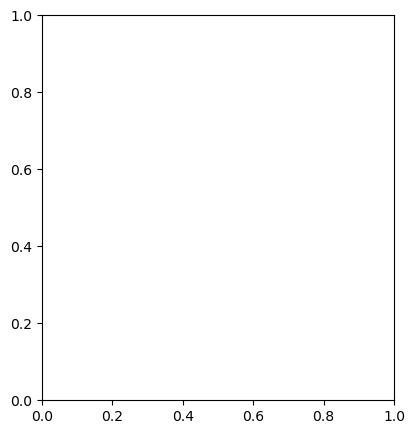

In [36]:
import matplotlib.pyplot as plt

# Assuming you have the 'history' object from your model training

# Plot training & validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()